In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

/Users/appanna/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Import Data

In [2]:
# import data
df=pd.read_csv('25 May.csv')
df.head()

,Date,Location,Total points,Points flowering,New flowers,Total Flowers
0,12 Mar 20,3*2ag,8,NaN,0.0,NaN
1,12 Mar 20,3*3g,2,NaN,NaN,NaN
2,12 Mar 20,4*3a,9,NaN,1.0,NaN
3,12 Mar 20,4*2a,8,NaN,NaN,NaN
4,12 Mar 20,5*2a,1,NaN,NaN,NaN


# Data cleaning

In [3]:
df.columns=df.columns.str.replace(' ','_') #Rename columns to remove blank space
df.columns

Index(['Date', 'Location', 'Total_points', 'Points_flowering', 'New_flowers',
       'Total_Flowers'],
      dtype='object')

In [4]:
# Check date range
df1=df.copy() #make copy to preserve original dataframe
df1['Date'].unique()

array(['12 Mar 20', '13 Mar 20', '16 Mar 20', '17 Mar 20', '18 Mar 20',
       '19 Mar 20', '20 Mar 20', '21 Mar 20', '22 Mar 20', '23 Mar 20',
       '24 Mar 20', '25 Mar 20', '26 Mar 20', '27 Mar 20', '28 Mar 20',
       '29 Mar 20', '30 Mar 20', '31 Mar 20', '1 Apr 20', '2 Apr 20',
       '3 Apr 20', '4 Apr 20', '5 Apr 20', '6 Apr 20', '7 Apr 20',
       '8 Apr 20', '9 Apr 20', '10 Apr 20', '11 Apr 20', '12 Apr 20',
       '13 Apr 20', '14 Apr 20', '15 Apr 20', '16 Apr 20', '17 Apr 20',
       '18 Apr 20', '19 Apr 20', '20 Apr 20', '21 Apr 20', '22 Apr 20',
       '23 Apr 20', '24 Apr 20', '25 Apr 20', '26 Apr 20', '27 Apr 20',
       '28 Apr 20', '29 Apr 20', '30 Apr 20', '1 May 20', '2 May 20',
       '3 May 20', '4 May 20', '5 May 20', '6 May 20', '7 May 20',
       '8 May 20', '9 May 20', '10 May 20', '11 May 20', '12 May 20',
       '13 May 20', '14 May 20', '15 May 20', '16 May 20', '17 May 20',
       '18 May 20', '19 May 20', '20 May 20', '21 May 20', '22 May 20',
       '23

In [5]:
# From which date do we have values for 'points flowering'
#df.Date.loc[~df.Points_flowering.isnull()].iloc[0] 
df1.Date.loc[~df.Points_flowering.isnull()].unique()

array(['19 Mar 20', '20 Mar 20', '21 Mar 20', '22 Mar 20', '23 Mar 20',
       '24 Mar 20', '25 Mar 20', '26 Mar 20', '27 Mar 20', '28 Mar 20',
       '29 Mar 20', '30 Mar 20', '31 Mar 20', '1 Apr 20', '2 Apr 20',
       '3 Apr 20', '4 Apr 20', '5 Apr 20', '6 Apr 20', '7 Apr 20',
       '8 Apr 20', '9 Apr 20', '10 Apr 20', '11 Apr 20', '12 Apr 20',
       '13 Apr 20', '14 Apr 20', '15 Apr 20', '16 Apr 20', '17 Apr 20',
       '18 Apr 20', '19 Apr 20', '20 Apr 20', '21 Apr 20', '22 Apr 20',
       '23 Apr 20', '24 Apr 20', '25 Apr 20', '26 Apr 20', '27 Apr 20',
       '28 Apr 20', '29 Apr 20', '30 Apr 20', '1 May 20', '2 May 20',
       '3 May 20', '4 May 20', '5 May 20', '6 May 20', '7 May 20',
       '8 May 20', '9 May 20', '10 May 20', '11 May 20', '12 May 20',
       '13 May 20', '14 May 20', '15 May 20', '16 May 20', '17 May 20',
       '18 May 20', '19 May 20', '20 May 20', '21 May 20', '22 May 20',
       '23 May 20', '24 May 20', '25 May 20'], dtype=object)

In [6]:
# check unique locations
df1['Location'].unique()

array(['3*2ag', '3*3g', '4*3a', '4*2a', '5*2a', '5*2ag', '4*3a2g', '5*4a',
       '5*4as', '6*5a', '7*3as', '7*3a', '7*2a', '7*a', '6*2a', '7*c',
       '9*2a', '8*d', '8*3a', '8*3a2s', '10*as', '11*g', '12*g', '13*g',
       '8*4a', '8*4a2s', '12*2ag', '15*2d', '17*a', '19*d', '20*a',
       '23*3a', '10*s', '21*g', '7*3a3s', '7*3a2s', '10*2a', '16*m',
       '5*3as', '19*2d', '25*3g', '19*m', '17*m', '18*g', '1*4a', '2*5a',
       '18*m', '19*s', '19*s->19*m', '19*m->19*2m', '19*2m', '12*m',
       '12*2a', '12*2g', '11*a', '12*2a->12*a', '12*a', '8*2d',
       '10*s -> 10*m', '10*2m', '10*as->10*2m', '10*2m->10*3m'],
      dtype=object)

In [ ]:
# Modify location codes fo dates before the modification. For modified dates return only the updated location.

In [7]:
len(df1['Location'].unique())

62

In [10]:
#Check rows of 'Total_points' where there are transitions '->'
#df1[df1.Total_points.str.contains('->',na=False)] # without na=false, nan values give error
def list_sub(lst):
    lst=list(map(int,lst))
    return (lst[1]-lst[0])

In [85]:
#Check rows of 'Points_flowering' where there are transitions '->'
new_points=df1[df1.Points_flowering.str.contains('->',na=False)] # without na=false, nan values give error

#define a function to convert list elements to int and perform a subtraction 
def list_sub(lst):
    lst=list(map(int,lst))
    return (lst[1]-lst[0])

#create new column with number of new points 
new_points['new_points']=new_points['Points_flowering'].str.split('->').apply(list_sub)



#What can be inferred:
#which day had maximum new points occuring. co-relation with rain/watering?
#trend of points increasing vs points decreasing. net

#new_points


/Users/appanna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [90]:
#Check rows of 'Points_flowering' where there are transitions '->'
#new_points=df1[df1.Points_flowering.str.contains('->',na=False)] # without na=false, nan values give error

#define a function to convert list elements to int and perform a subtraction 
def list_sub(lst):
    if isinstance(lst,list):
        if len(lst)==2:
            lst=list(map(int,lst))
            return (lst[1]-lst[0])
        else:
            return 0
    else:
        return 0

#create new column with number of new points 
df1['new_points']=df1['Points_flowering'].str.split('->').apply(list_sub)



#What can be inferred:
#which day had maximum new points occuring. co-relation with rain/watering?
#trend of points increasing vs points decreasing. net

#df1[df1.Points_flowering.str.contains('->',na=False)]
df1

,Date,Location,Total_points,Points_flowering,New_flowers,Total_Flowers,new_points
0,12 Mar 20,3*2ag,8,NaN,0.0,NaN,0
1,12 Mar 20,3*3g,2,NaN,NaN,NaN,0
2,12 Mar 20,4*3a,9,NaN,1.0,NaN,0
3,12 Mar 20,4*2a,8,NaN,NaN,NaN,0
4,12 Mar 20,5*2a,1,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...
3166,25 May 20,19*2m,2,0,0.0,"1,110",0
3167,25 May 20,20*a,3,0,0.0,"9,9,14",0
3168,25 May 20,21*g,3,0,0.0,"9,13,7",0
3169,25 May 20,23*3a,5,0,0.0,"10,12,5,8,7",0


In [93]:
#create hue for increase or decrease
conditions = [
    (df1['new_points'] >0),
    (df1['new_points'] <0)]
choices = ['inc', 'dec']
df1['trans_hue']=np.select(conditions, choices, default=np.nan)



pandas.core.frame.DataFrame

In [76]:
#Stacked bar chart for total increase and decrease in number of points, for a day
#Steps:
#separate into positive and negative columns
maskn = new_points['new_points'] < 0
new_points['neg_trans']=new_points['new_points'].mask(~maskn)
new_points['pos_trans']=new_points['new_points'].mask(maskn)

#groupby date with sum of positive and negative transitions 
date_trans=new_points.groupby('Date',sort=False)[['neg_trans','pos_trans']].sum()
date_trans['neg_trans']=date_trans['neg_trans'].apply(abs) #absolute value. convert negative to positive
date_trans


/Users/appanna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/appanna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,neg_trans,pos_trans
Date,,
29 Mar 20,0.0,1.0
30 Mar 20,0.0,2.0
2 Apr 20,0.0,14.0
3 Apr 20,0.0,2.0
4 Apr 20,0.0,13.0
5 Apr 20,0.0,7.0
6 Apr 20,0.0,7.0
7 Apr 20,0.0,7.0
8 Apr 20,0.0,2.0


In [ ]:
# Plot stacked bar chart


In [57]:
new_poi_sep

,Date,Location,Total_points,Points_flowering,New_flowers,Total_Flowers,new_points,Date,Location,Total_points,Points_flowering,New_flowers,Total_Flowers,new_points
493,29 Mar 20,5*4a,9,5->6,9.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
522,30 Mar 20,3*2ag,8,3->5,4.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,2 Apr 20,4*3a2g,12,1->5,5.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,2 Apr 20,4*3a,9,2->4,4.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
640,2 Apr 20,4*2a,9,2->3,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20 May 20,8*2d,2,1->0,0.0,NaN,-1.0
2902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20 May 20,18*g,8,4->3,3.0,NaN,-1.0
2942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21 May 20,12*m,2,1->0,0.0,NaN,-1.0
3058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23 May 20,18*g,8,3->2,2.0,NaN,-1.0


In [41]:
np=new_points.groupby('Date')
np

In [8]:
#For transitions with '->' use second character
df1['Total_points']=df1['Total_points'].astype(str)#mixed float and str objects converted to uniform str column
df1['Points_flowering']=df1['Points_flowering'].astype(str)
for ind,row in df1.iterrows():
    if '->' in row['Total_points']:
        df1.loc[ind,'Total_points']=df1.loc[ind,'Total_points'].split('->')[1] # select 2nd location
    if '->' in row['Points_flowering']:
        df1.loc[ind,'Points_flowering']=df1.loc[ind,'Points_flowering'].split('->')[1] # select 2nd location

In [9]:
#Check rows of 'Total_points' where there are transitions '->'
df1[df1.Total_points.str.contains('->',na=False)] # without na=false, nan values give error

,Date,Location,Total_points,Points_flowering,New_flowers,Total_Flowers


In [10]:
# Create column for cumulative number of new flowers. Indicate color as number of flowering points
df1['cum_sum']=df1.groupby('Location').cumsum()
#df[df['Location']=='3*2ag'] # check with 1 location if cum_sum is working alright

# Bar chart race
    -Location must figure on the chart only after it starts flowering.
    -Points flowering data occurs only after 19th March, so filter dataframe to those.
    -Use notnull to display points which are flowering only

In [11]:
# Location must figure on the chart only after it starts flowering.
# Points flowering data occurs only after 19th March, so filter dataframe to those.
# Use notnull to display points which are flowering only
df2=df1.copy() #check point for the data
df2.reset_index(inplace=True,drop=True)
df2.set_index('Date',inplace=True)
df2.drop(['12 Mar 20', '13 Mar 20', '16 Mar 20', '17 Mar 20', '18 Mar 20'],inplace=True) #drop dates with improper null
df2.reset_index(inplace=True)
#df2

In [12]:
# replace zeroes with nan values
df2['Points_flowering'].astype(str)
df2['Points_flowering'].replace('0',np.nan,inplace=True)
df2['Points_flowering'].replace('nan',np.nan,inplace=True)
#remove location 7*c, which had only 1 flower and stopped.
df2=df2[df2['Location']!='7*c']

In [30]:
# Last date
Date_last=dfpf['Date'].iloc[-1]
Date_last

'18 Apr 20'

In [28]:
# Prepare dff from data set to be able to plot bar chart for 1 frame
Date_last=dfpf['Date'].iloc[-1] #let us consider the last date for this
current_day= Date_last
dfpf=df2[df2['Points_flowering'].notnull()] # consider locations only once it flowers 
dff = (dfpf[dfpf['Date'].eq(current_day)]
       .sort_values(by='cum_sum', ascending=True))
#dff

<BarContainer object of 41 artists>

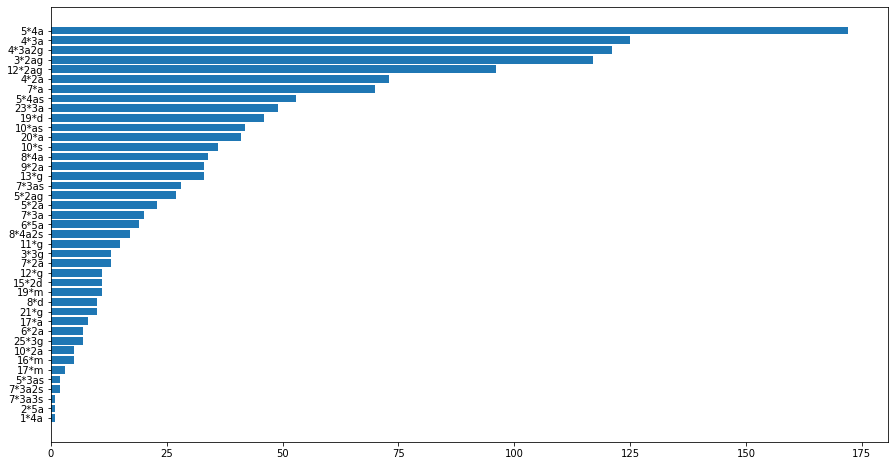

In [29]:
# Plot bar chart for 1 frame
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['Location'], dff['cum_sum'])

In [15]:
colors = dict(zip(
    ['1', '2', '3', '4','5', '6', '7','8','9','10','11','12','13'],
    ['#85C1E9', '#5DADE2', '#3498DB', '#2E86C1','#2874A6', '#76D7C4',
     '#48C9B0','#1ABC9C','#17A589','#148F77','#BB8FCE','#A569BD','#8E44AD']
    ))

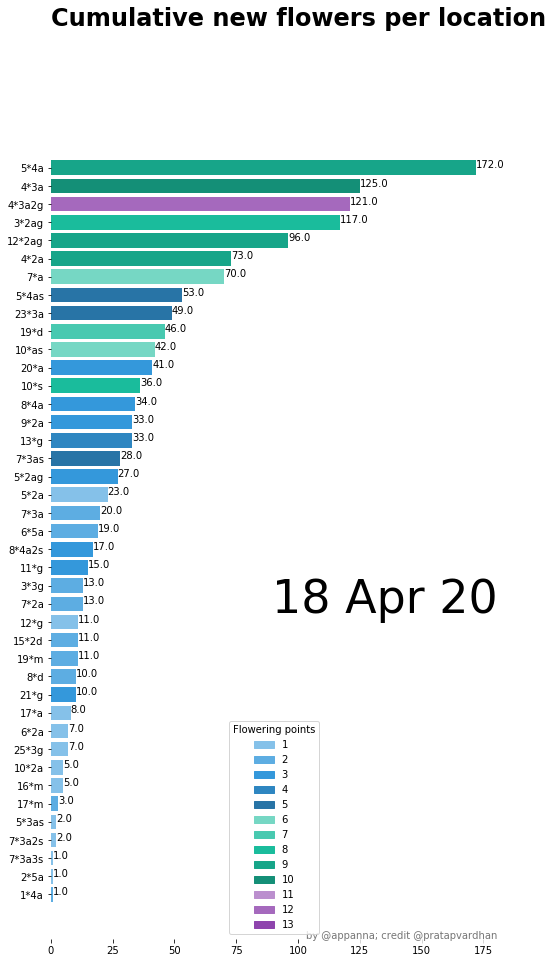

In [31]:
# Optimise table and pack into a function

#fig, ax = plt.subplots(figsize=(15, 8)) # original layout
fig, ax = plt.subplots(figsize=(8, 15))
def draw_barchart(current_date):
    dff = (dfpf[dfpf['Date'].eq(current_date)]
       .sort_values(by='cum_sum', ascending=True))
    ax.clear()
    dff['color']=dff['Points_flowering'].apply(lambda x: colors[x])     
    ax.barh(dff['Location'], dff['cum_sum'], color=dff.color)
    dx = dff['cum_sum'].max() / 200
    for i, (value, name) in enumerate(zip(dff['cum_sum'], dff['Location'])):
        ax.text(value, i, value, ha='left') 
        #ax.text(value, i,     name,            ha='right')  # Tokyo: name
    # ... polished styles
    ax.text(0, 1.12, 'Cumulative new flowers per location',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @appanna; credit @pratapvardhan', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    ax.text(1, 0.4, current_date, transform=ax.transAxes, size=46, ha='right')
    #ax.legend(colors)         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    plt.legend(handles, labels, loc='lower center', title='Flowering points')
    
draw_barchart(Date_last)


In [17]:
f=dfpf['Date'].unique() #date range to consider for animation frames

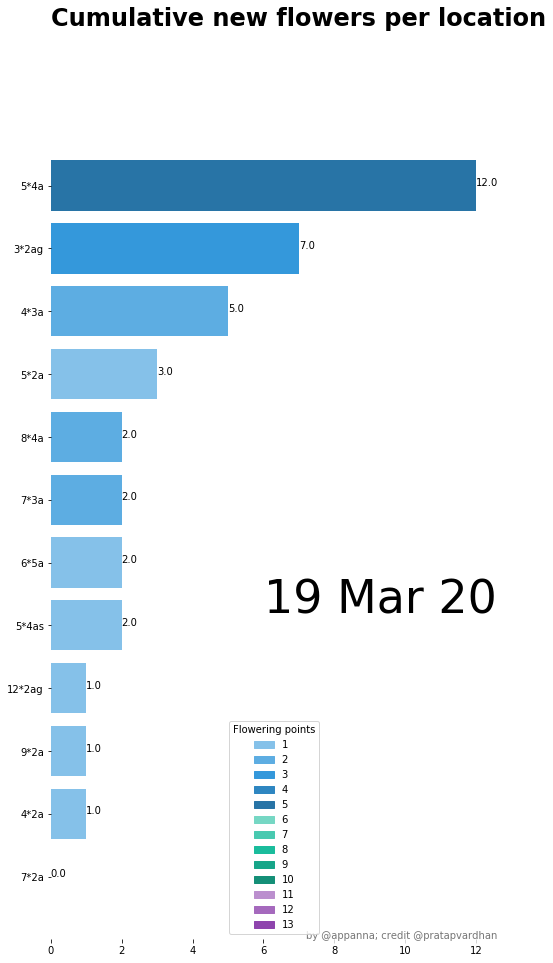

In [34]:
import matplotlib.animation as animation
from IPython.display import HTML
#fig, ax = plt.subplots(figsize=(15, 8))
fig, ax = plt.subplots(figsize=(8, 15))
animator = animation.FuncAnimation(fig, draw_barchart, frames=f)
HTML(animator.to_jshtml()) 
#animator.to_html5_video() 
#animator.save('Vanilla 2020.mp4',writer="ffmpeg", fps=2, bitrate=1800)

In [42]:
dfpf.head()

,Date,Location,Total_points,Points_flowering,New_flowers,Total_Flowers,cum_sum
0,19 Mar 20,3*2ag,8,3,2.0,NaN,7.0
2,19 Mar 20,4*3a,9,2,1.0,NaN,5.0
3,19 Mar 20,4*2a,8,1,0.0,NaN,1.0
6,19 Mar 20,5*2a,1,1,0.0,NaN,3.0
8,19 Mar 20,5*4a,9,5,2.0,NaN,12.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

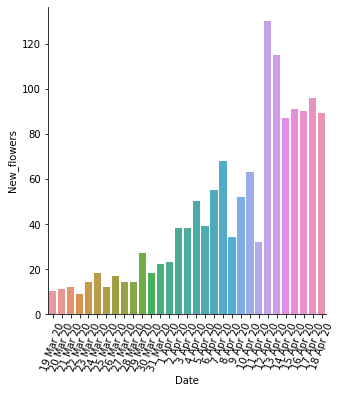

In [44]:
sns.catplot(x="Date", y='New_flowers', kind='bar', ci=False,estimator=sum,data=dfpf )
plt.xticks(rotation=70)

In [41]:
#Total new flowers so far
Loc_max=df.groupby(['Date','Location'],sort=False).agg({
    'Points': 'mean', 
    'New Flowers':'sum', 
    'Flower total':'sum',
    })

Loc_max.head()

SpecificationError: nested renamer is not supported